<a href="https://colab.research.google.com/github/cedric-bit/MLP/blob/main/LEDKDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO-F-422 - Statistical Foundations of Machine Learning
## Project: Modeling Earthquake Damage
# INTRODUCTION
DrivenData competition Richter's Predictor: Modeling Earthquake Damage The main objective of this project is to develop a prediction model capable of estimating the level of damage to buildings during an earthquake in Nepal, depending on various structural and geographical characteristics. 
We have a dataset (train.features and test.features) including information on buildings, their structure, geographical location and legal status, collected after the Gorkha earthquake in Nepal in 2015. The dataset includes 38 explanatory variables (numerical, categorical and binary) and one target variable, the level of damage (train.labels), which is an ordered categorical variable with three possible levels (low, medium, high)

In [ ]:
install.packages("ggplot2")
library(ggplot2)


In [47]:
set.seed(5)

# Data preprocessing
Data pre-processing is an important step in the analysis of our data. This involves cleaning, transforming and normalising the data to make it ready to be used to train machine learning models.

We have three CSV files of data that can be downloaded from the competition site :

* train.features: This CSV file contains the training data that will be used to 
train machine learning models. The data in this file includes input features and known output values (i.e., the target variable).

* train.labels: This CSV file contains the known output values for the training data in train.features. These known output values will be used to train and evaluate the performance of machine learning models.

* test.features: This CSV file contains new data that the trained machine learning models will be used to make predictions on. This file contains input features for which the target variable (i.e., the output) is not known.

In [25]:
train.features <- read.csv(file="train_values.csv",stringsAsFactors = T)
train.labels <- read.csv(file="train_labels.csv",stringsAsFactors = T)
test.features <- read.csv(file="test_values.csv",stringsAsFactors = T)

In [39]:
dim(train.features) 

[1] 260601     39

In [40]:
dim(test.features) 

[1] 86868    39

This means that our training set contains 260601 building observations and their 39 associated features and test set contains 86868 building observations and their 39 associated features. we can observe that the test set is smaller than the training set



In [38]:
str(train.labels)

'data.frame':	260601 obs. of  2 variables:
 $ building_id : int  802906 28830 94947 590882 201944 333020 728451 475515 441126 989500 ...
 $ damage_grade: int  3 2 3 2 3 2 3 1 2 1 ...


The categorical variable damage_grade represents the level of damage suffered by the building affected by the earthquake. 

There are three levels of damage:

* represents low damage
* represents a medium level of damage
* represents almost complete destruction

In [26]:
str(train.features)

'data.frame':	260601 obs. of  39 variables:
 $ building_id                           : int  802906 28830 94947 590882 201944 333020 728451 475515 441126 989500 ...
 $ geo_level_1_id                        : int  6 8 21 22 11 8 9 20 0 26 ...
 $ geo_level_2_id                        : int  487 900 363 418 131 558 475 323 757 886 ...
 $ geo_level_3_id                        : int  12198 2812 8973 10694 1488 6089 12066 12236 7219 994 ...
 $ count_floors_pre_eq                   : int  2 2 2 2 3 2 2 2 2 1 ...
 $ age                                   : int  30 10 10 10 30 10 25 0 15 0 ...
 $ area_percentage                       : int  6 8 5 6 8 9 3 8 8 13 ...
 $ height_percentage                     : int  5 7 5 5 9 5 4 6 6 4 ...
 $ land_surface_condition                : Factor w/ 3 levels "n","o","t": 3 2 3 3 3 3 1 3 3 3 ...
 $ foundation_type                       : Factor w/ 5 levels "h","i","r","u",..: 3 3 3 3 3 3 3 5 3 2 ...
 $ roof_type                             : Factor w/ 3 level

In [27]:
str(test.features)

'data.frame':	86868 obs. of  39 variables:
 $ building_id                           : int  300051 99355 890251 745817 421793 871976 691228 896100 343471 766647 ...
 $ geo_level_1_id                        : int  17 6 22 26 17 22 26 8 16 26 ...
 $ geo_level_2_id                        : int  596 141 19 39 289 170 432 1373 244 761 ...
 $ geo_level_3_id                        : int  11307 11987 10044 633 7970 4029 6794 958 3521 3137 ...
 $ count_floors_pre_eq                   : int  3 2 2 1 3 1 2 2 2 2 ...
 $ age                                   : int  20 25 5 0 15 55 0 35 30 5 ...
 $ area_percentage                       : int  7 13 4 19 8 4 6 2 6 6 ...
 $ height_percentage                     : int  6 5 5 3 7 3 7 8 5 7 ...
 $ land_surface_condition                : Factor w/ 3 levels "n","o","t": 3 3 3 3 3 3 1 3 3 1 ...
 $ foundation_type                       : Factor w/ 5 levels "h","i","r","u",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ roof_type                             : Factor w/ 3 levels

In [29]:
get_var_type <- function(x) {
  if (is.factor(x)) {
    return("Categorical")
  } else if (length(unique(x)) == 2) {
    return("Binary")
  } else {
    return("Numerical")
  }
}

var_info <- data.frame(variable = names(train.features),
                       var_type = sapply(train.features, get_var_type),
                       count = sapply(train.features, function(x) length(unique(x))))

var_types <- sapply(train.features, get_var_type)
type_counts <- table(var_types)
type_counts


var_types
     Binary Categorical   Numerical 
         22           8           9 

In [31]:
get_var_type <- function(x) {
  if (is.factor(x)) {
    return("Categorical")
  } else if (length(unique(x)) == 2) {
    return("Binary")
  } else {
    return("Numerical")
  }
}

var_types <- sapply(train.features, get_var_type)

categorical_indices <- which(var_types == "Categorical")
binary_indices <- which(var_types == "Binary")
numeric_indices <- which(var_types == "Numerical")
categorical_variables <- names(train.features)[categorical_indices]
binary_variables <- names(train.features)[binary_indices]
numeric_variables <- names(train.features)[numeric_indices]
cat("Categorical variables:\n")
print(categorical_variables)

cat("Binary variables:\n")
print(binary_variables)

cat("Numeric variables:\n")
print(numeric_variables)


Categorical variables:
[1] "land_surface_condition" "foundation_type"        "roof_type"             
[4] "ground_floor_type"      "other_floor_type"       "position"              
[7] "plan_configuration"     "legal_ownership_status"
Binary variables:
 [1] "has_superstructure_adobe_mud"          
 [2] "has_superstructure_mud_mortar_stone"   
 [3] "has_superstructure_stone_flag"         
 [4] "has_superstructure_cement_mortar_stone"
 [5] "has_superstructure_mud_mortar_brick"   
 [6] "has_superstructure_cement_mortar_brick"
 [7] "has_superstructure_timber"             
 [8] "has_superstructure_bamboo"             
 [9] "has_superstructure_rc_non_engineered"  
[10] "has_superstructure_rc_engineered"      
[11] "has_superstructure_other"              
[12] "has_secondary_use"                     
[13] "has_secondary_use_agriculture"         
[14] "has_secondary_use_hotel"               
[15] "has_secondary_use_rental"              
[16] "has_secondary_use_institution"         
[17] "has_s

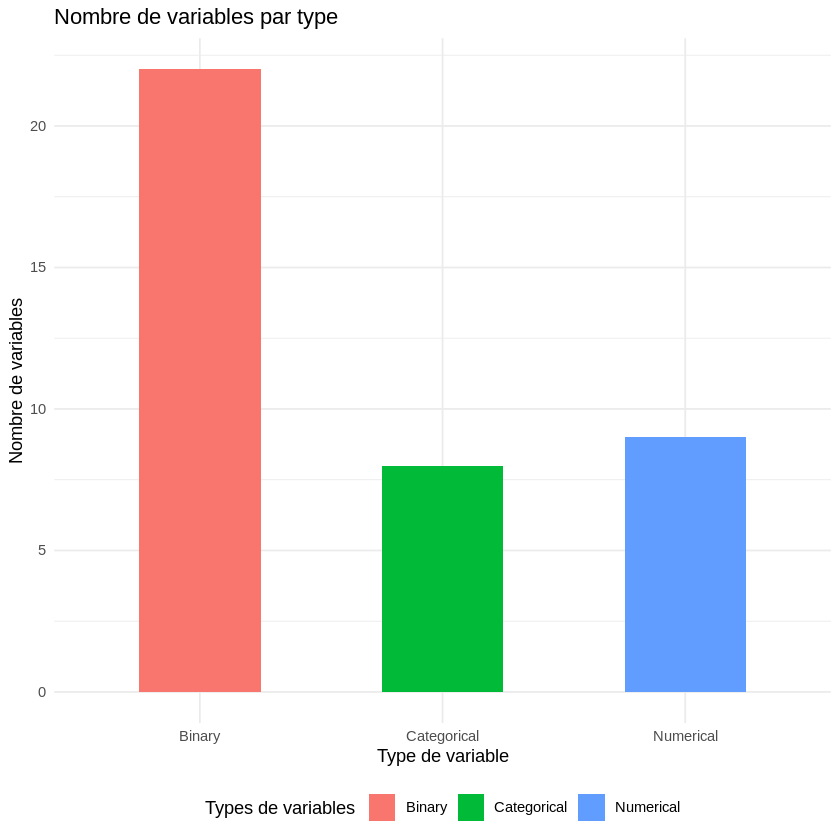

In [41]:

var_types_df <- data.frame(
  Type = c("Binary", "Categorical", "Numerical"),
  Count = c(22, 8, 9)
)

ggplot(var_types_df, aes(x = Type, y = Count, fill = Type)) +
  geom_bar(stat = "identity", width = 0.5) +
  theme_minimal() +
  labs(title = "Nombre de variables par type", x = "Type de variable", y = "Nombre de variables") +
  scale_fill_discrete(name = "Types de variables") +
  theme(legend.position = "bottom")


# Missing value imputation

Our analysis and observations allow us to conclude that the data set contains no missing (MV) or unattributed (NA) values for the variables present. This means that the data are complete and that no imputation or method of handling missing values is necessary for our analysis. The absence of missing values is an advantage for our project, as it reduces the risk of introducing errors in the analysis and the predictive model. It also facilitates the data preparation process, as we can focus on other aspects such as feature selection, feature engineering and model building without having to worry about missing values.

In [43]:
dim(train.features) 
dim(na.omit(train.features))

[1] 260601     39

[1] 260601     39

In [44]:
dim(test.features) 
dim(na.omit(test.features))

[1] 86868    39

[1] 86868    39

In [45]:
summary(train.features)

  building_id      geo_level_1_id geo_level_2_id   geo_level_3_id 
 Min.   :      4   Min.   : 0.0   Min.   :   0.0   Min.   :    0  
 1st Qu.: 261190   1st Qu.: 7.0   1st Qu.: 350.0   1st Qu.: 3073  
 Median : 525757   Median :12.0   Median : 702.0   Median : 6270  
 Mean   : 525676   Mean   :13.9   Mean   : 701.1   Mean   : 6258  
 3rd Qu.: 789762   3rd Qu.:21.0   3rd Qu.:1050.0   3rd Qu.: 9412  
 Max.   :1052934   Max.   :30.0   Max.   :1427.0   Max.   :12567  
                                                                  
 count_floors_pre_eq      age         area_percentage   height_percentage
 Min.   :1.00        Min.   :  0.00   Min.   :  1.000   Min.   : 2.000   
 1st Qu.:2.00        1st Qu.: 10.00   1st Qu.:  5.000   1st Qu.: 4.000   
 Median :2.00        Median : 15.00   Median :  7.000   Median : 5.000   
 Mean   :2.13        Mean   : 26.54   Mean   :  8.018   Mean   : 5.434   
 3rd Qu.:2.00        3rd Qu.: 30.00   3rd Qu.:  9.000   3rd Qu.: 6.000   
 Max.   :9.00       

In [46]:
summary(test.features)

  building_id      geo_level_1_id  geo_level_2_id   geo_level_3_id 
 Min.   :      7   Min.   : 0.00   Min.   :   0.0   Min.   :    0  
 1st Qu.: 264422   1st Qu.: 7.00   1st Qu.: 350.0   1st Qu.: 3073  
 Median : 526984   Median :12.00   Median : 709.0   Median : 6276  
 Mean   : 526628   Mean   :13.89   Mean   : 704.1   Mean   : 6262  
 3rd Qu.: 789084   3rd Qu.:21.00   3rd Qu.:1054.0   3rd Qu.: 9416  
 Max.   :1052923   Max.   :30.00   Max.   :1427.0   Max.   :12567  
                                                                   
 count_floors_pre_eq      age         area_percentage  height_percentage
 Min.   :1.000       Min.   :  0.00   Min.   : 1.000   Min.   : 2.000   
 1st Qu.:2.000       1st Qu.: 10.00   1st Qu.: 5.000   1st Qu.: 4.000   
 Median :2.000       Median : 15.00   Median : 7.000   Median : 5.000   
 Mean   :2.133       Mean   : 26.55   Mean   : 8.014   Mean   : 5.436   
 3rd Qu.:2.000       3rd Qu.: 30.00   3rd Qu.: 9.000   3rd Qu.: 6.000   
 Max.   :8.000    

In [ ]:
int_variables<-which(sapply(train.features[1,],class)=="integer")
head(train.features[,-int_variables])